In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.select_dtypes(include=['object']).columns


Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [5]:
df.isnull().sum().sort_values(ascending=False).head(6)

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0


In [6]:
df.shape

(32561, 15)

In [7]:
import numpy as np

df = df.replace(' ?', np.nan)


In [8]:
df.isnull().sum().sort_values(ascending=False).head(6)

,0
occupation,1843
workclass,1836
native.country,583
fnlwgt,0
education,0
education.num,0


In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['occupation']]=impute.fit_transform(df[['occupation']])
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['workclass']]=impute.fit_transform(df[['workclass']])

In [11]:
df = df.dropna()


In [12]:
df.isnull().sum().sort_values(ascending=False).head(6)

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0


In [13]:
df.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [14]:
df.drop_duplicates(inplace=True)

df.reset_index(drop=True,inplace=True)

In [15]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


In [17]:
one=OneHotEncoder()


In [18]:
X=one.fit_transform(df[['workclass']]).toarray()
for index, col in enumerate(one.categories_[0]):
    df[col] = X[:, index]


df = df.drop('workclass', axis=1)

In [19]:
df

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,native.country,income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,<=50K,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31950,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31951,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,United-States,>50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31952,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31953,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

df['education'] = df['education'].str.strip()


education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate'
]

ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['education'] = ordinal_encoder.fit_transform(df[['education']])


In [22]:
df['marital.status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [23]:
X=one.fit_transform(df[['marital.status']]).toarray()
for index, col in enumerate(one.categories_[0]):
    df[col] = X[:, index]


df = df.drop('marital.status', axis=1)

In [24]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
X=one.fit_transform(df[['occupation']]).toarray()
for index, col in enumerate(one.categories_[0]):
    df[col] = X[:, index]


df = df.drop('occupation', axis=1)

In [26]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [27]:
X=one.fit_transform(df[['relationship']]).toarray()
for index, col in enumerate(one.categories_[0]):
    df[col] = X[:, index]


df = df.drop('relationship', axis=1)

In [28]:
df['race'].unique()
# 'race', 'sex', 'native.country', 'income'

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [29]:
X=one.fit_transform(df[['race']]).toarray()
for index, col in enumerate(one.categories_[0]):
    df[col] = X[:, index]


df = df.drop('race', axis=1)

In [30]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [31]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [32]:
df['native.country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [33]:
X=one.fit_transform(df[['native.country']]).toarray()
for index, col in enumerate(one.categories_[0]):
    df[col] = X[:, index]


df = df.drop('native.country', axis=1)

In [34]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [35]:
X=df.drop('income',axis=1)
y=df['income']

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

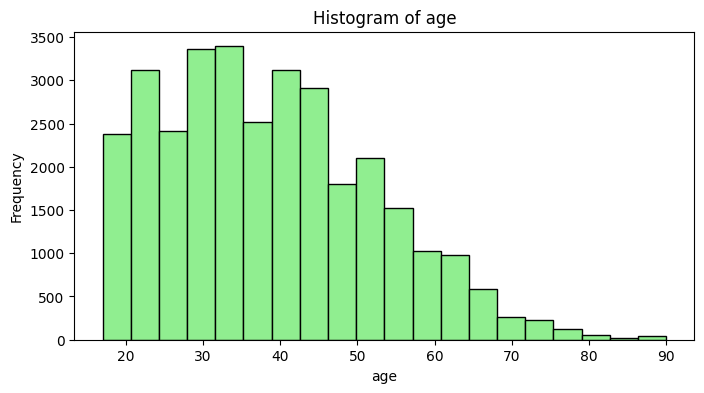

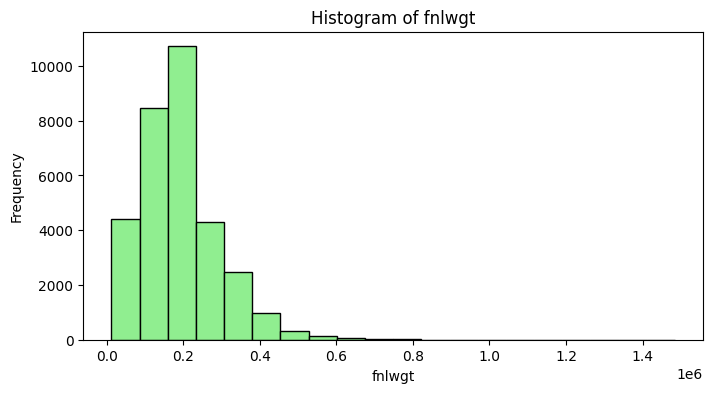

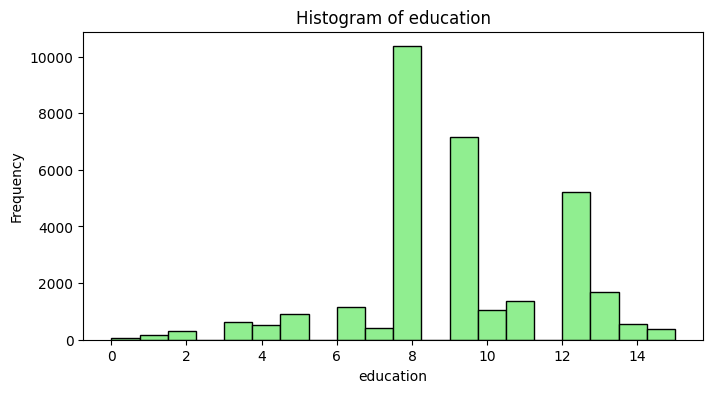

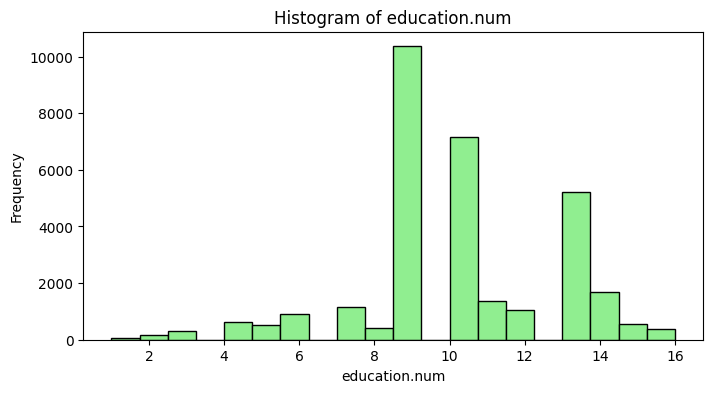

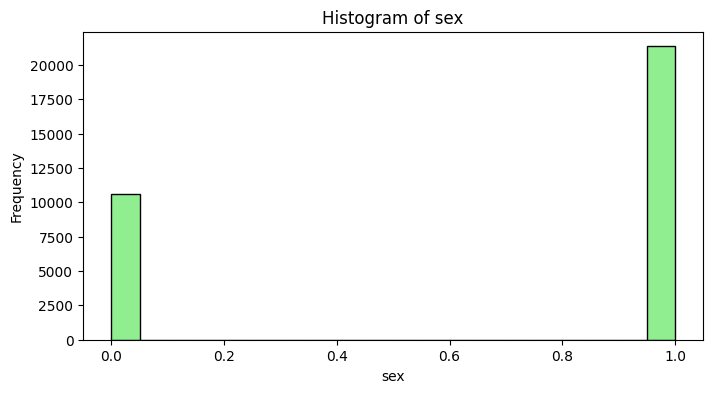

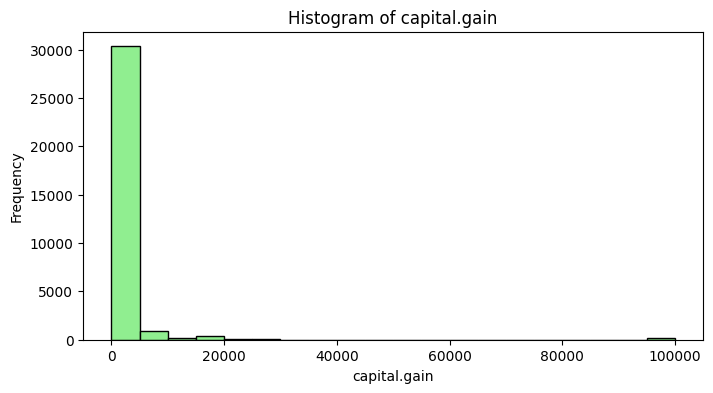

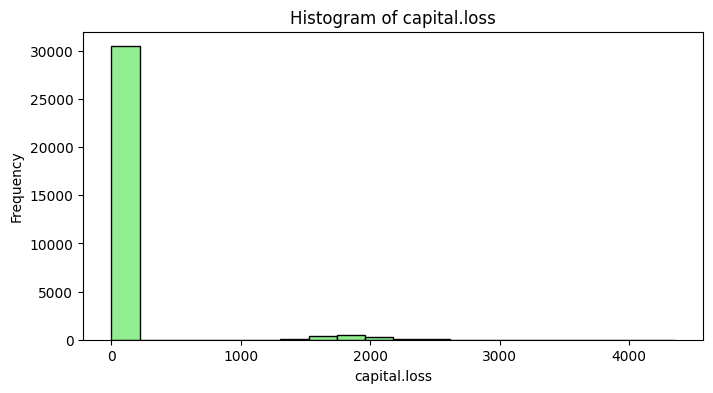

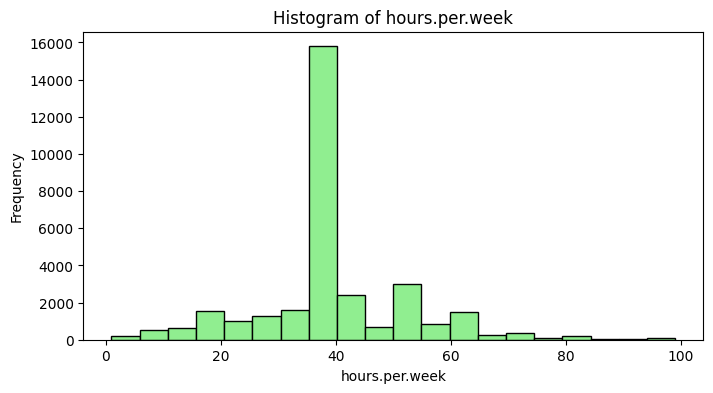

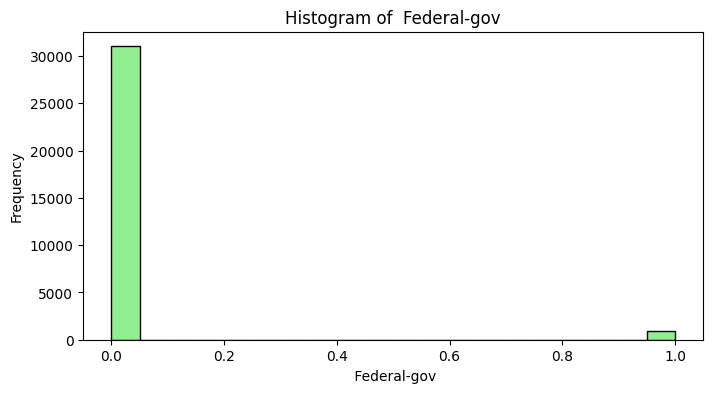

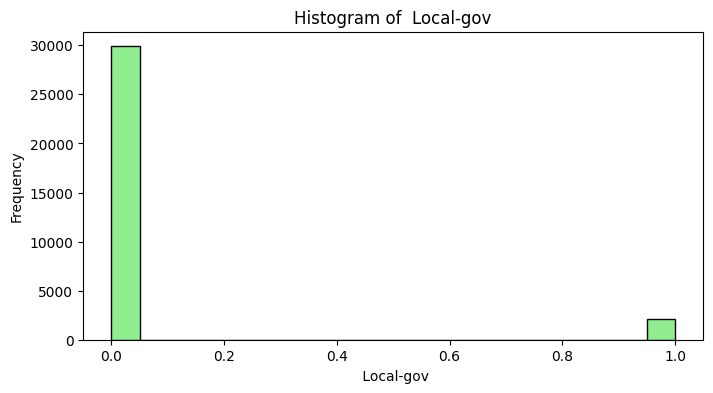

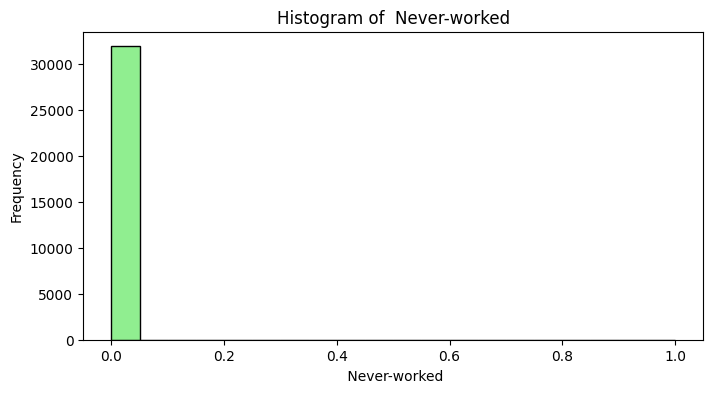

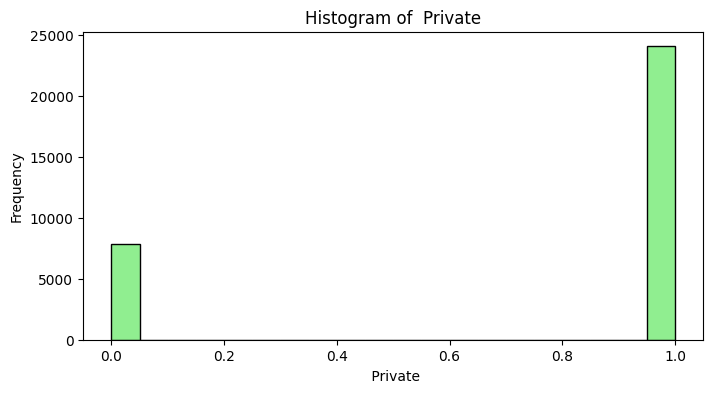

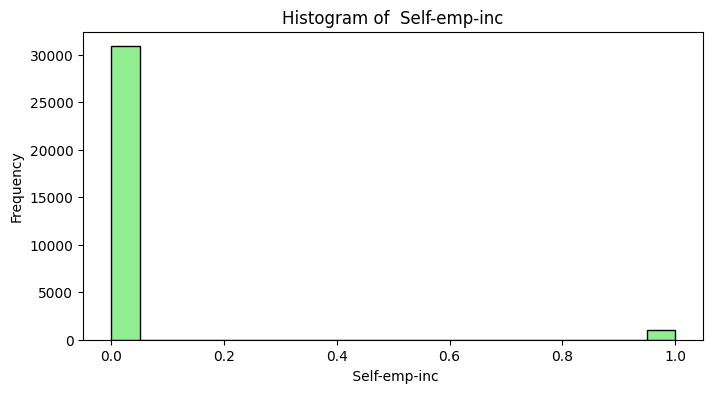

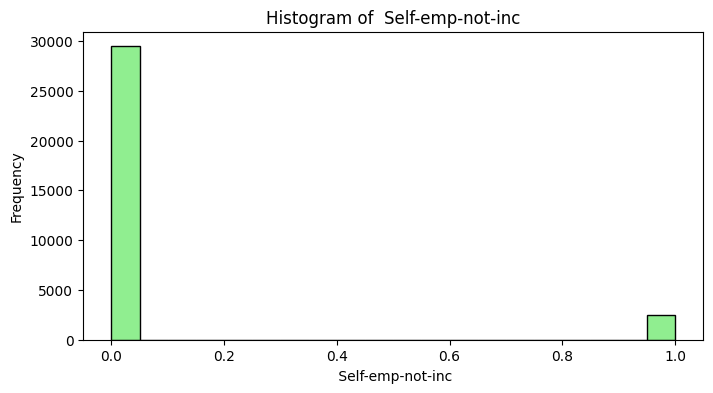

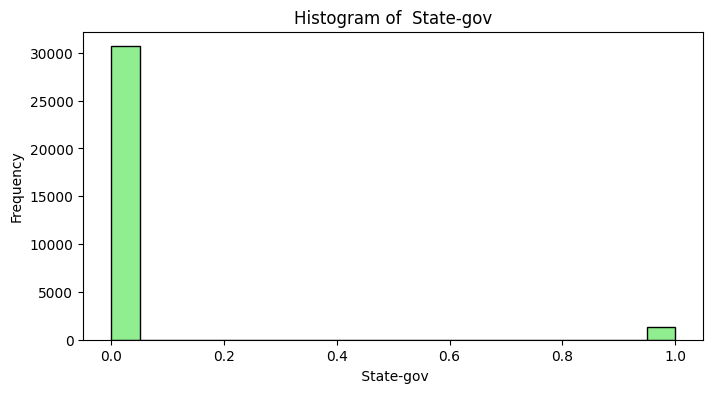

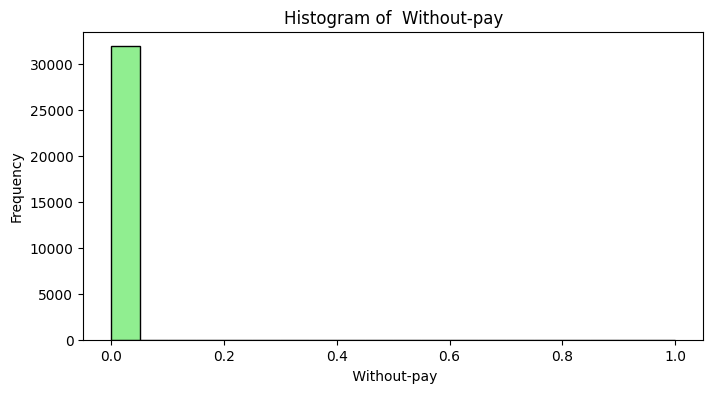

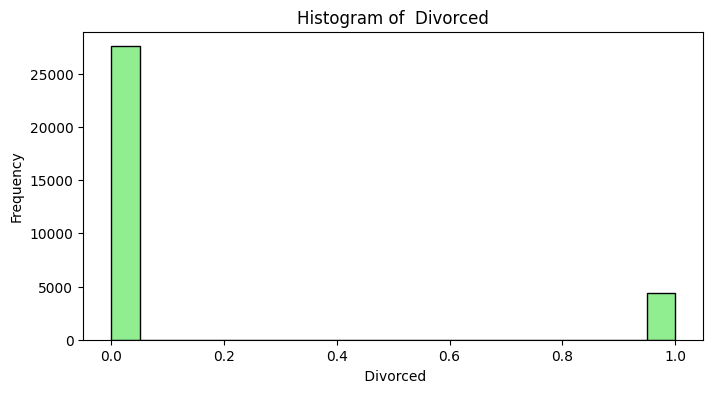

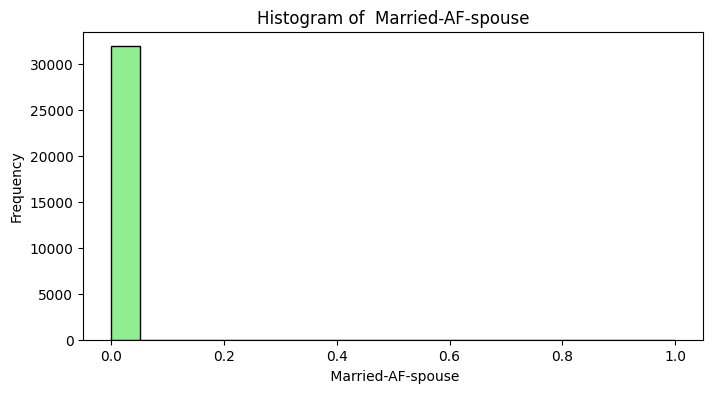

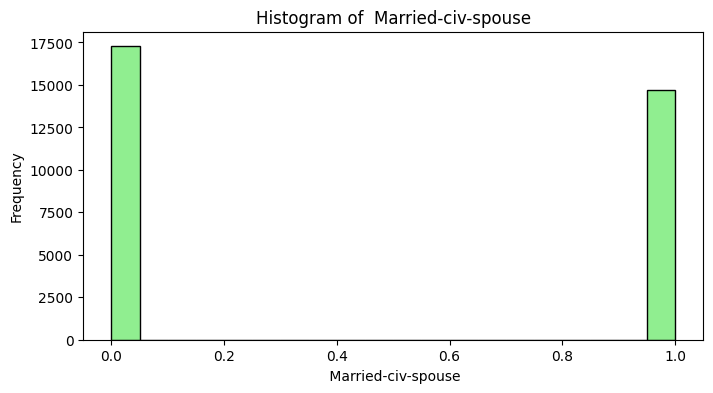

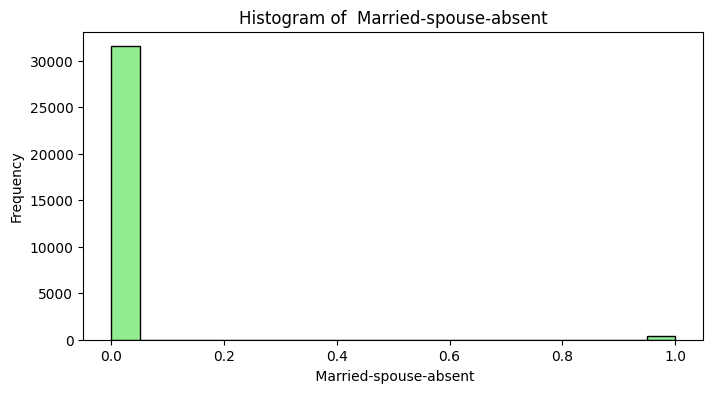

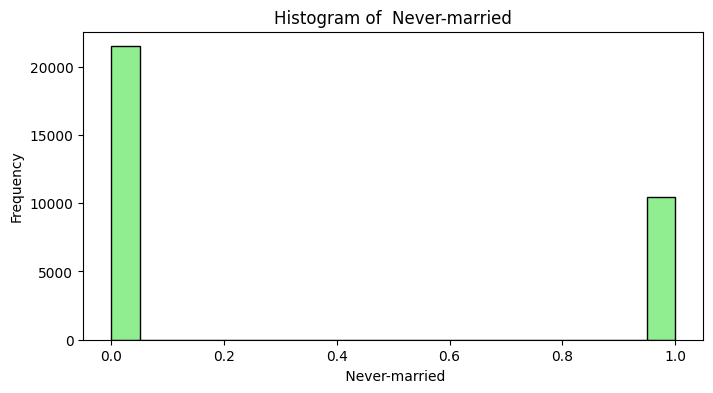

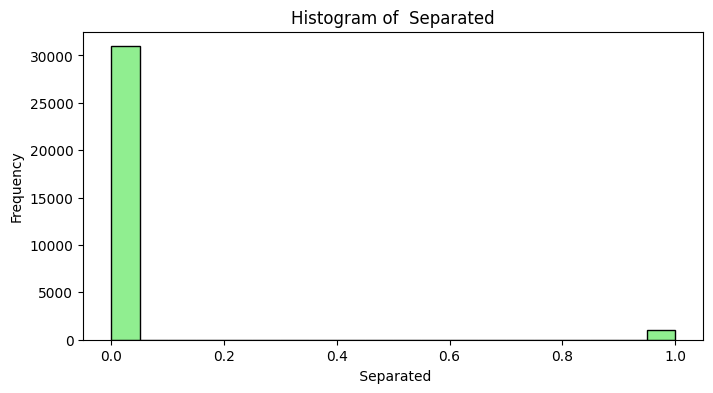

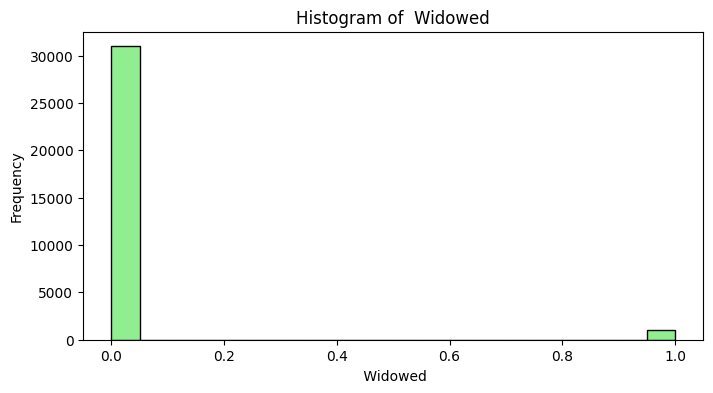

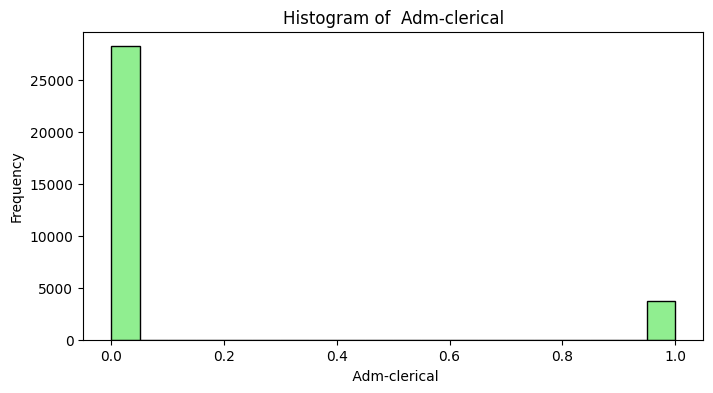

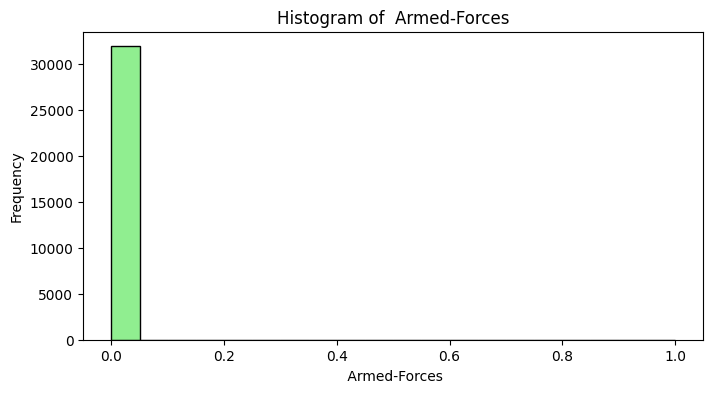

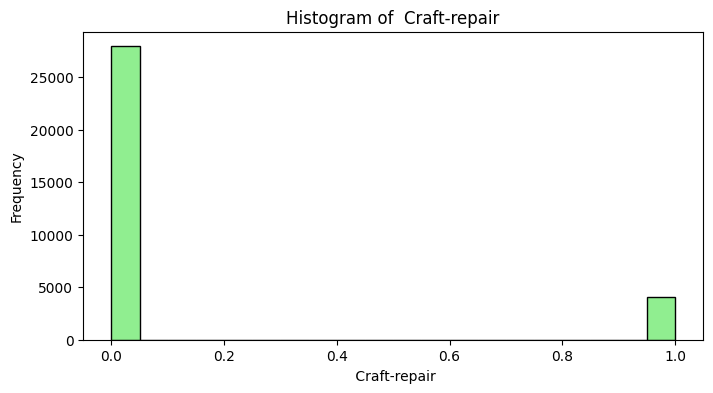

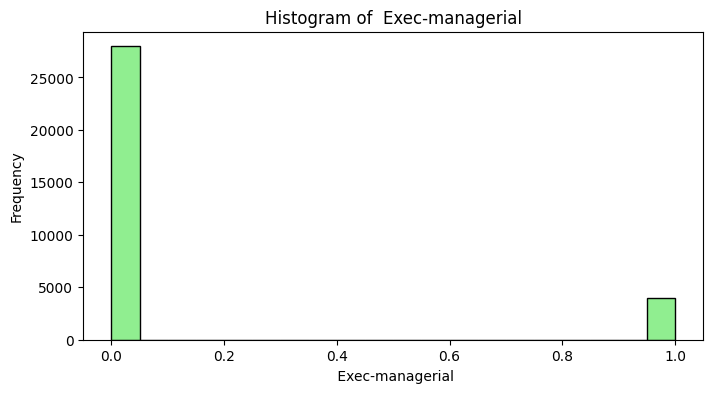

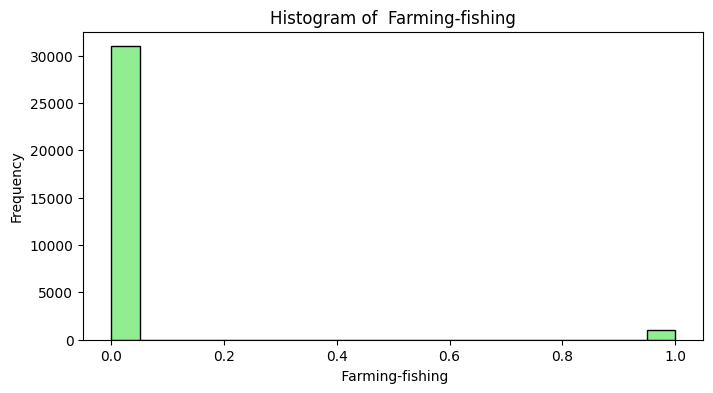

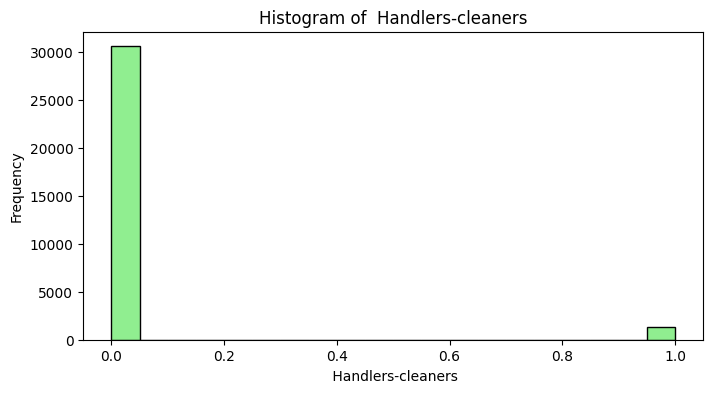

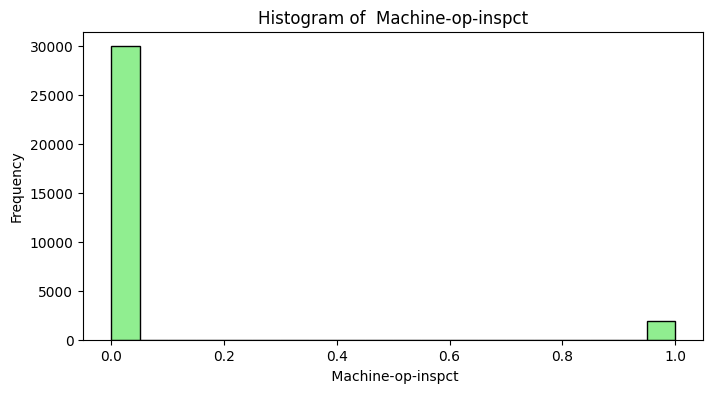

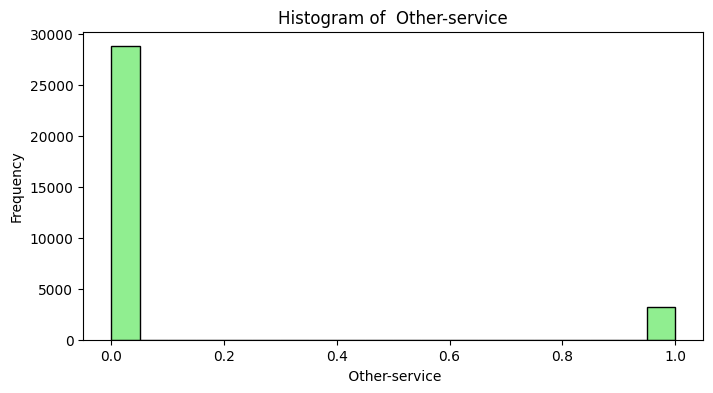

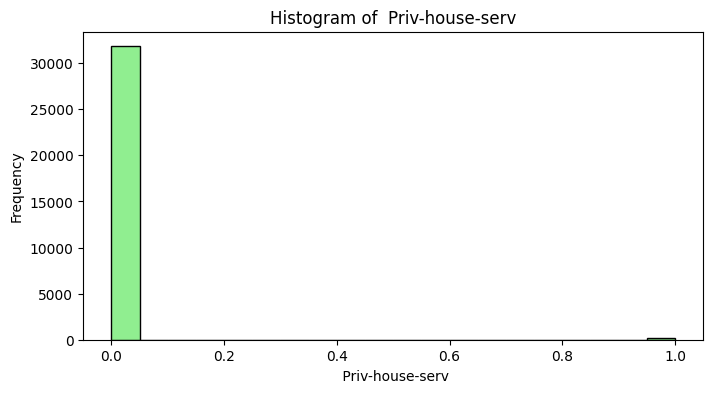

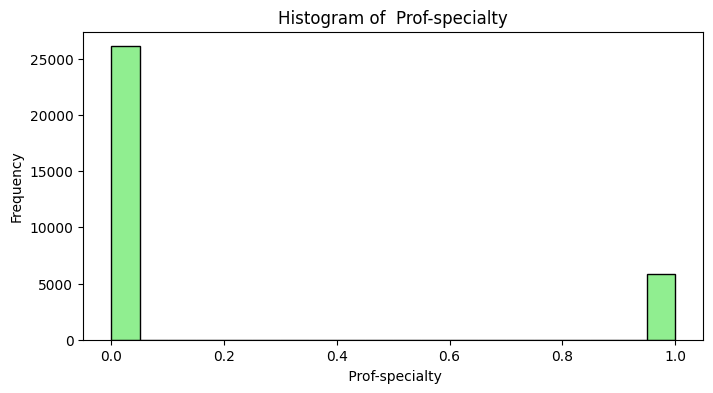

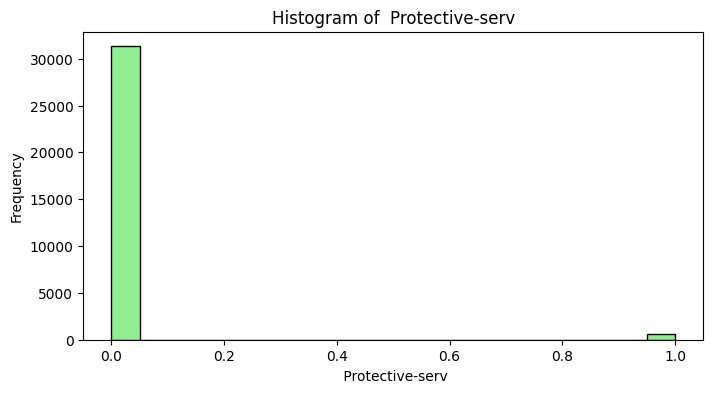

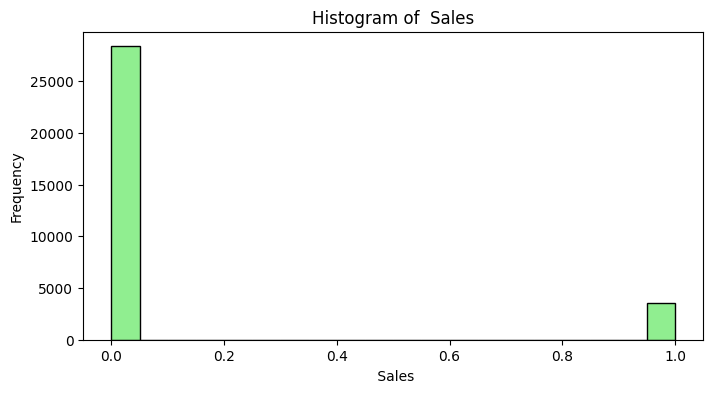

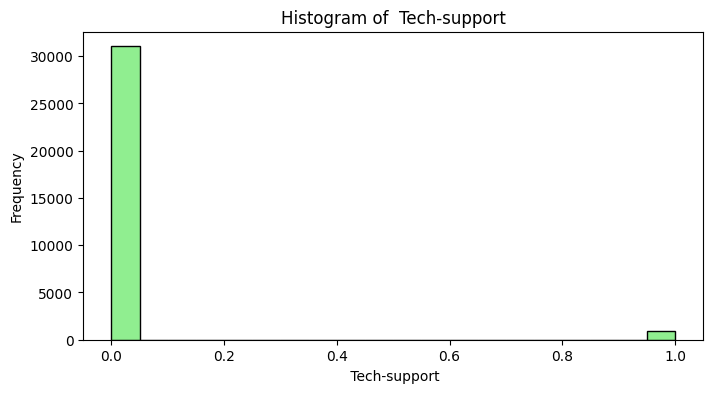

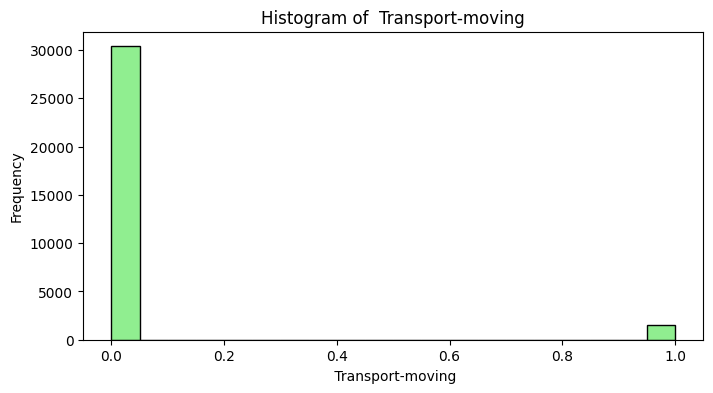

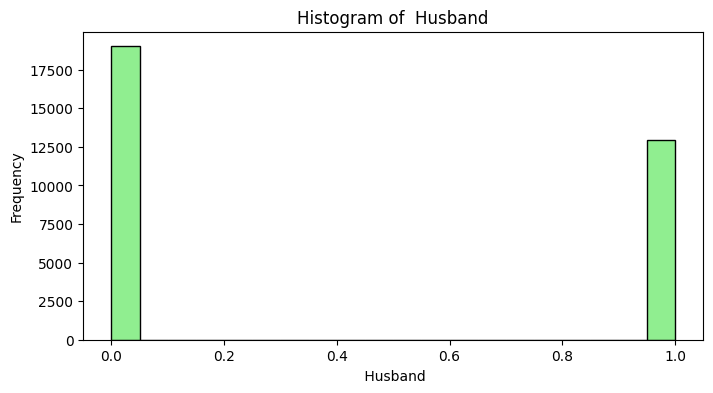

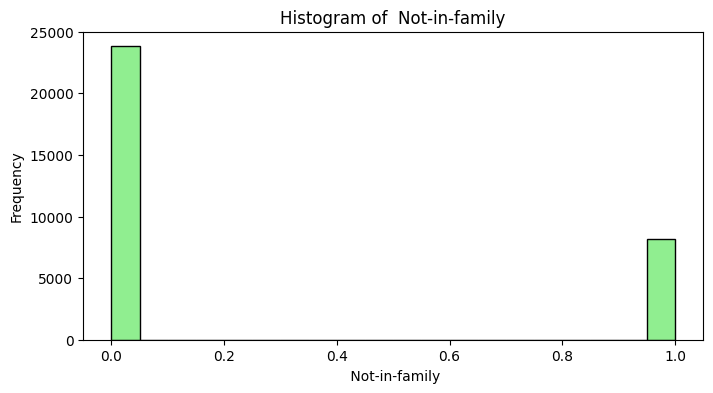

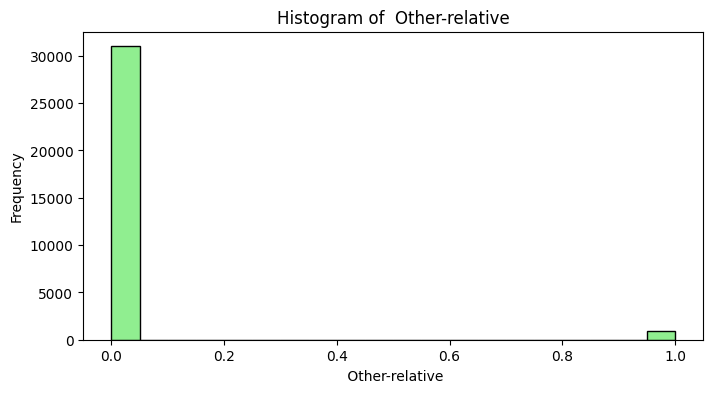

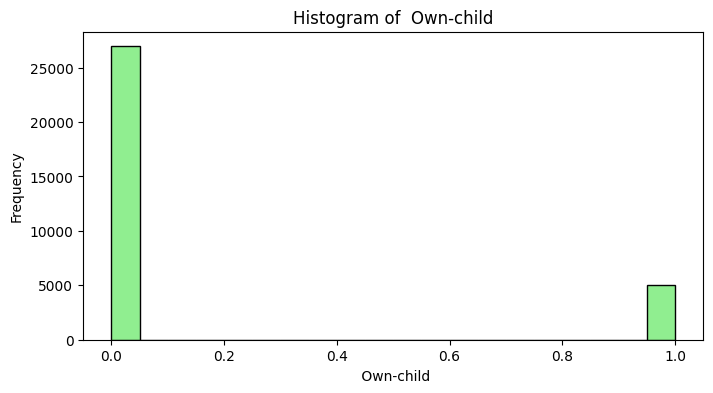

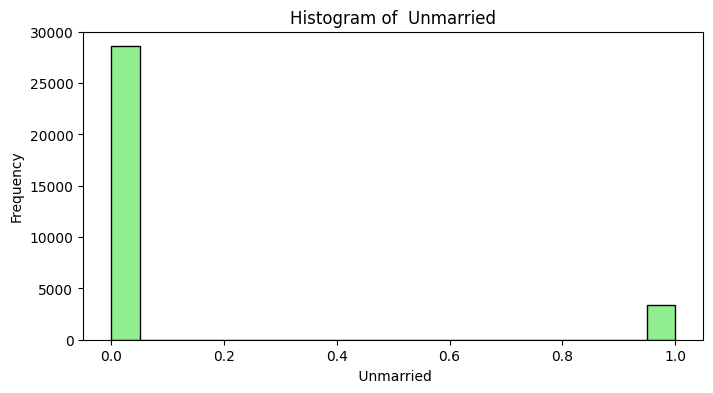

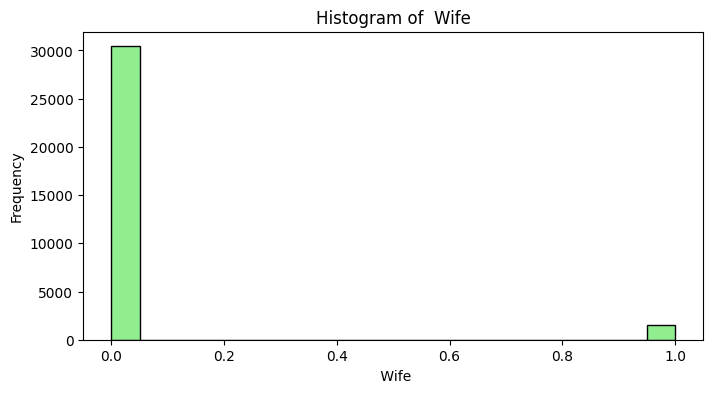

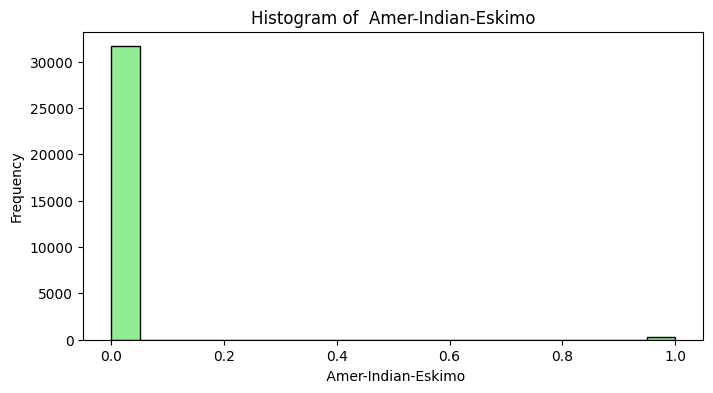

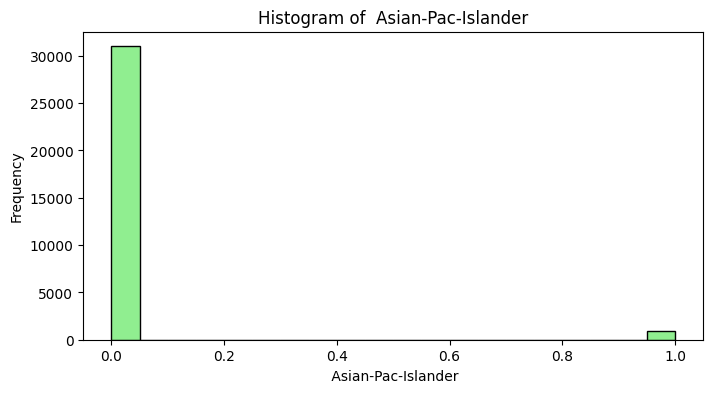

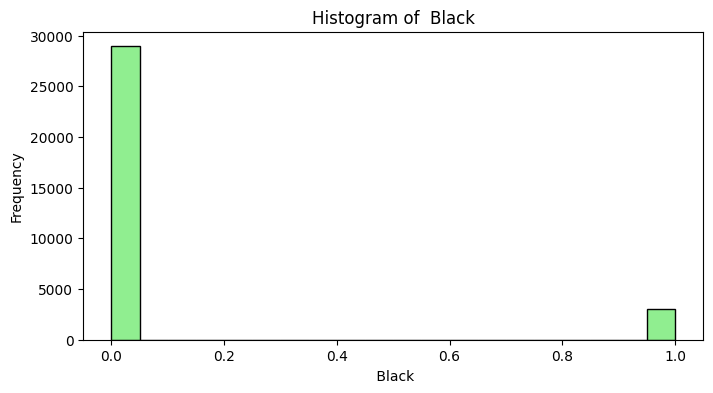

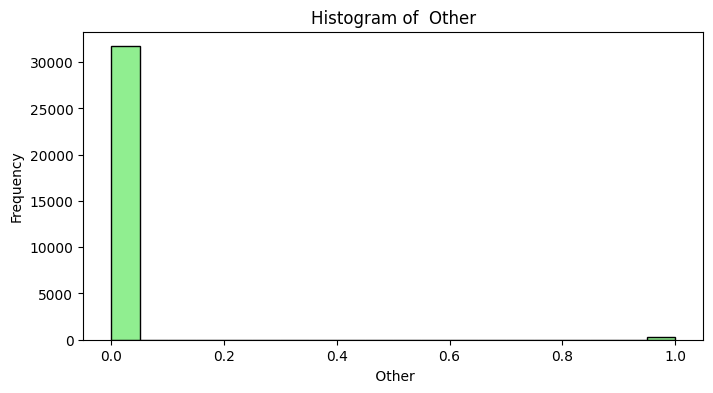

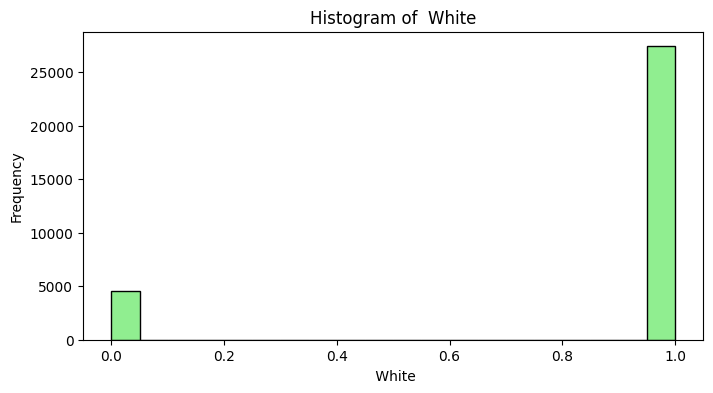

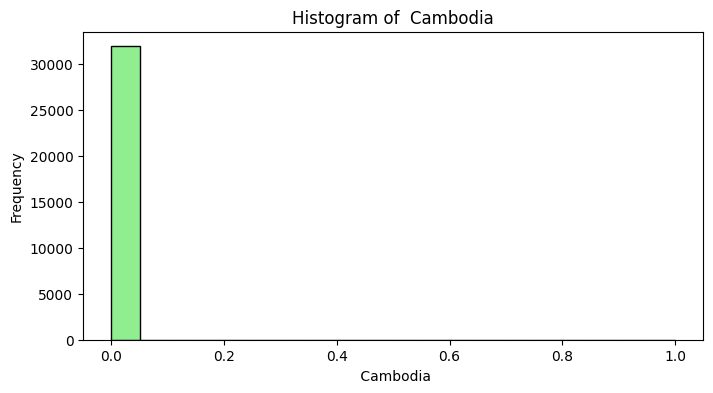

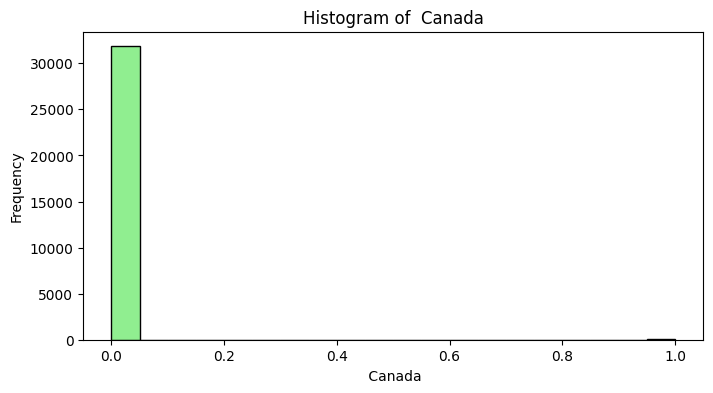

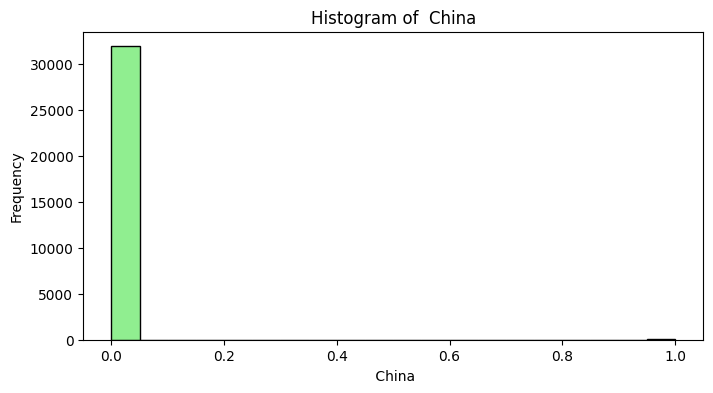

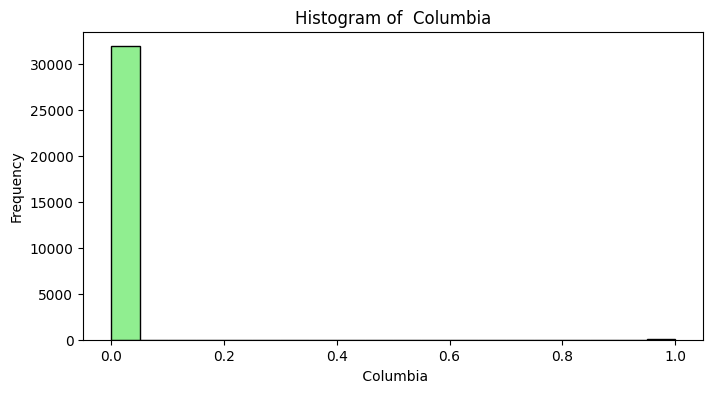

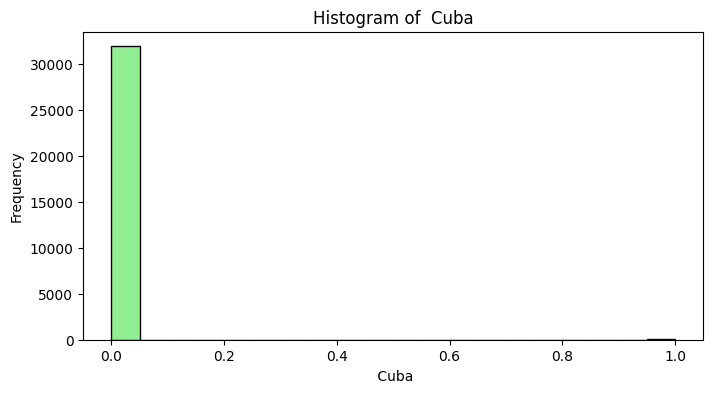

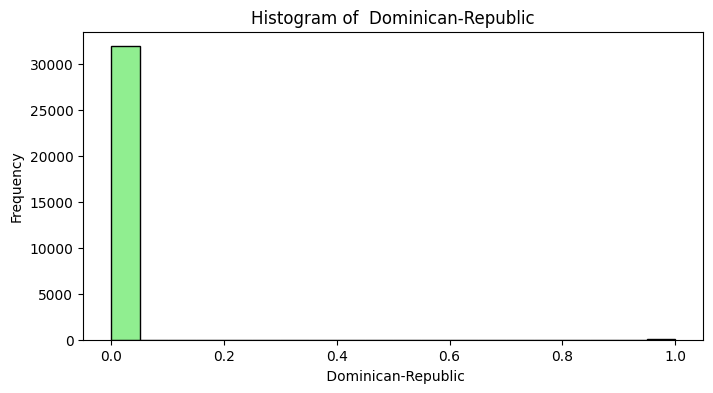

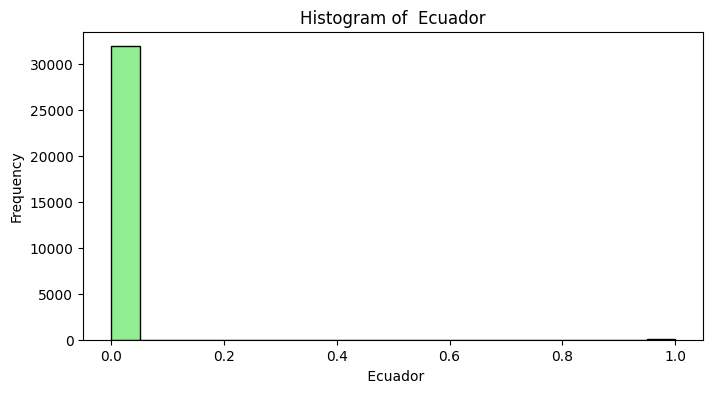

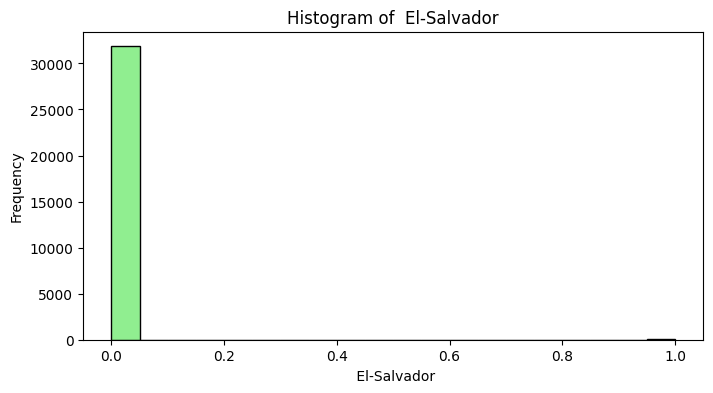

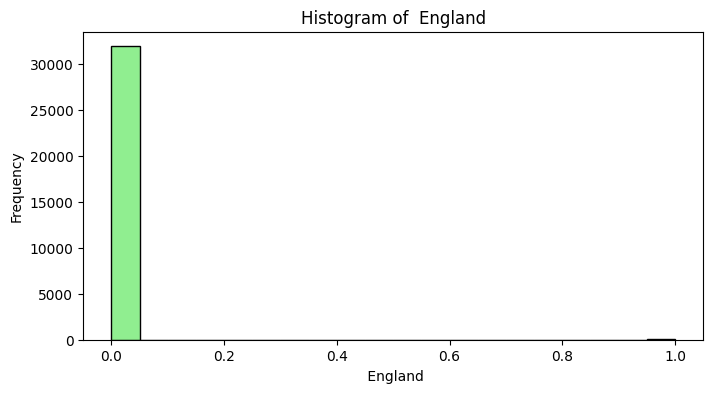

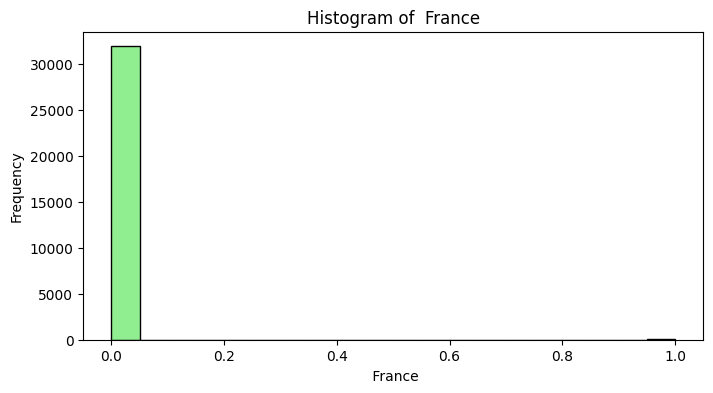

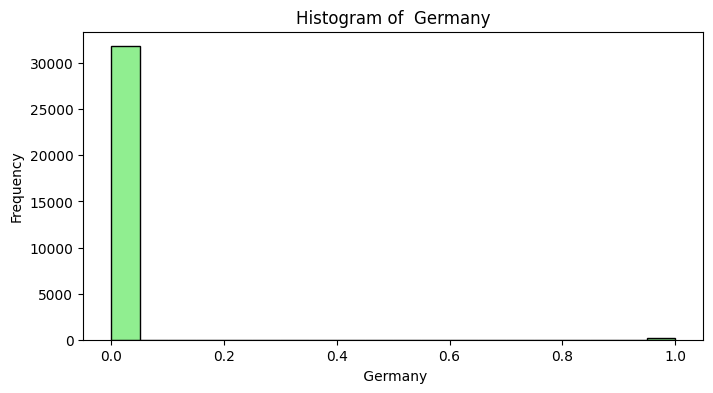

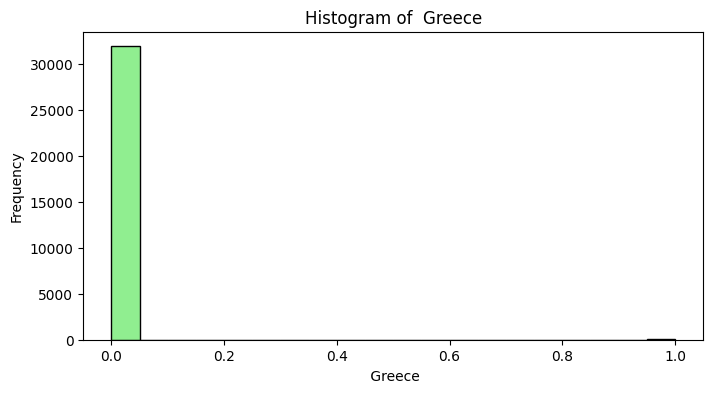

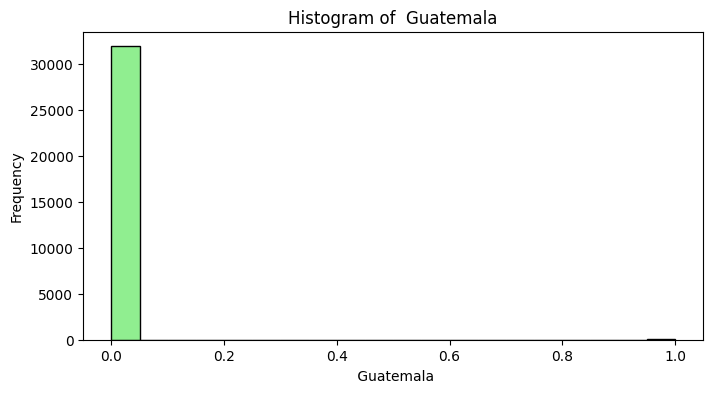

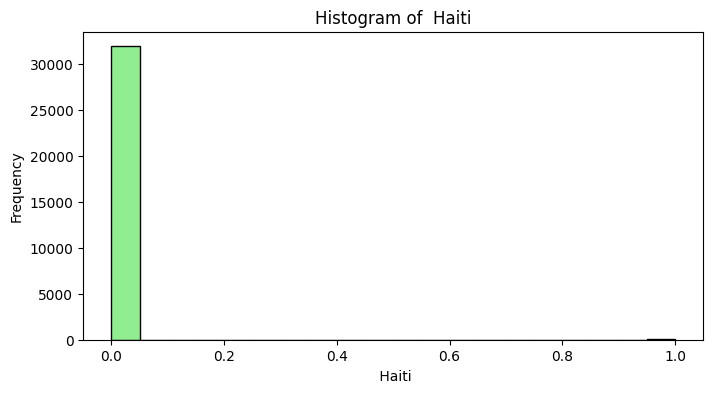

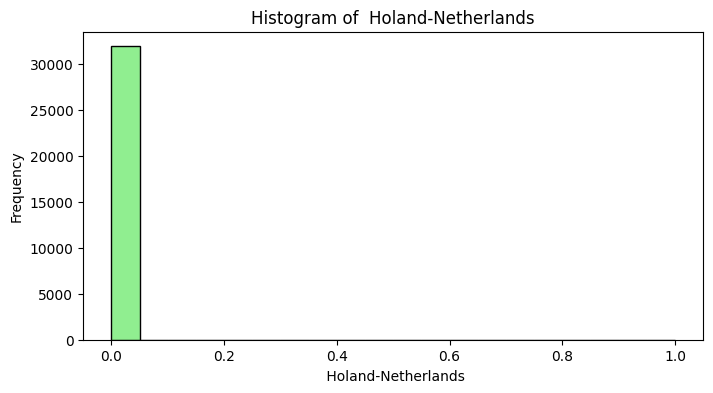

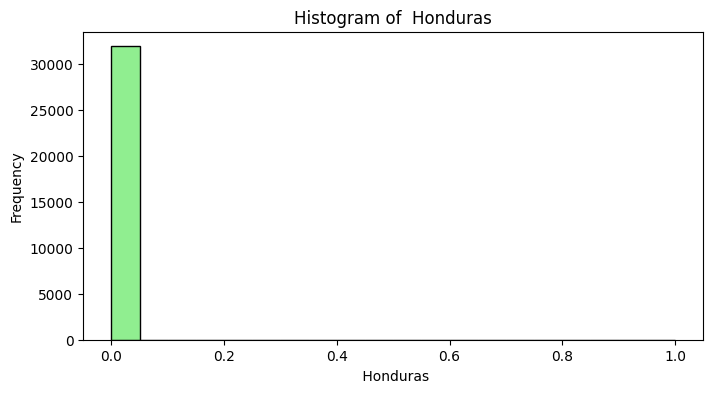

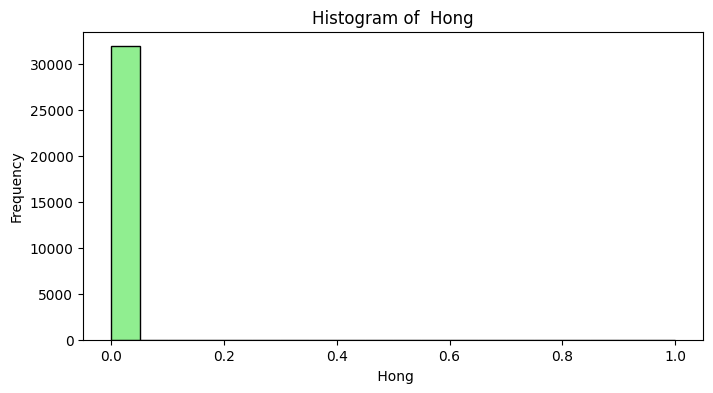

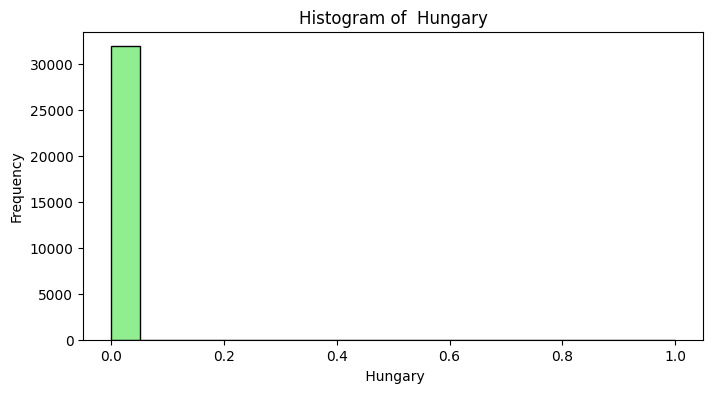

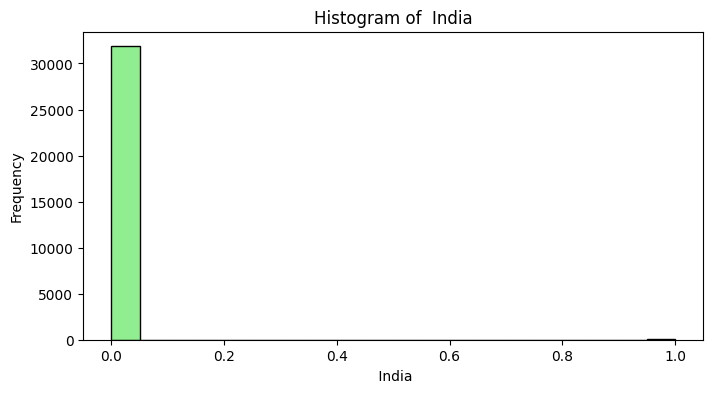

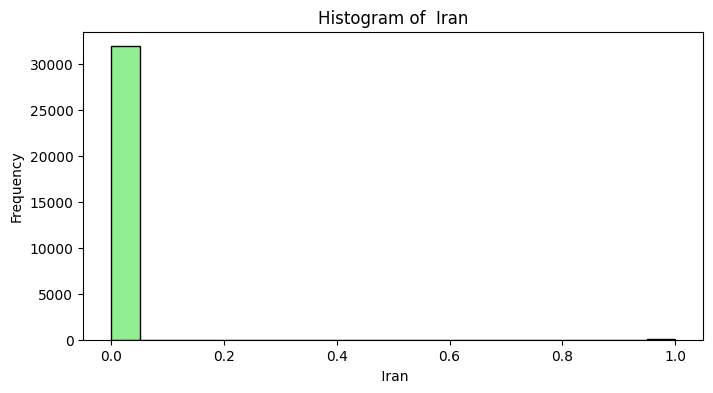

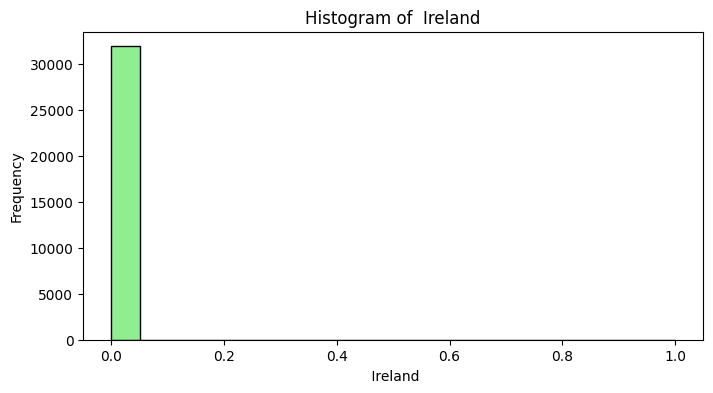

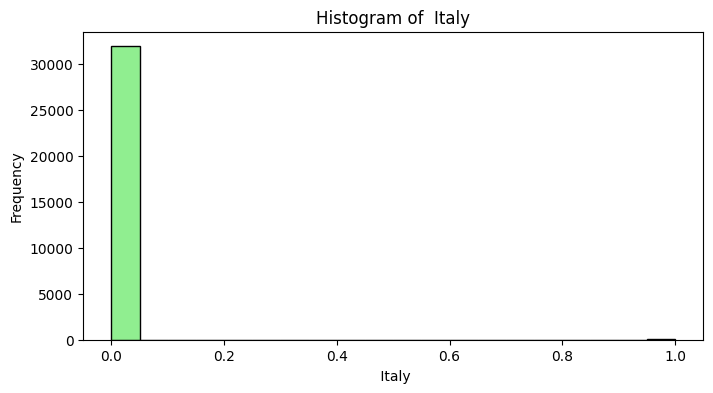

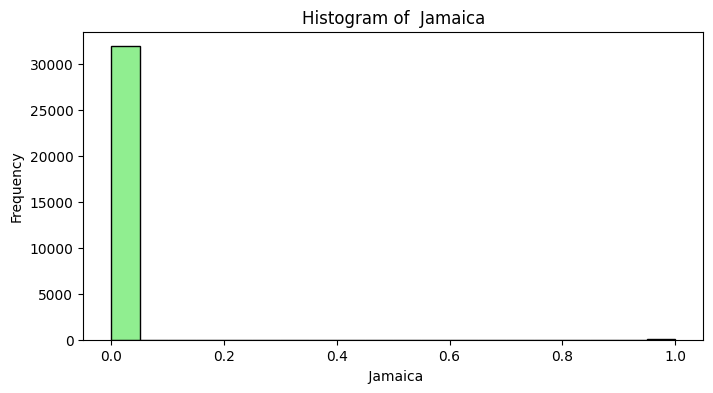

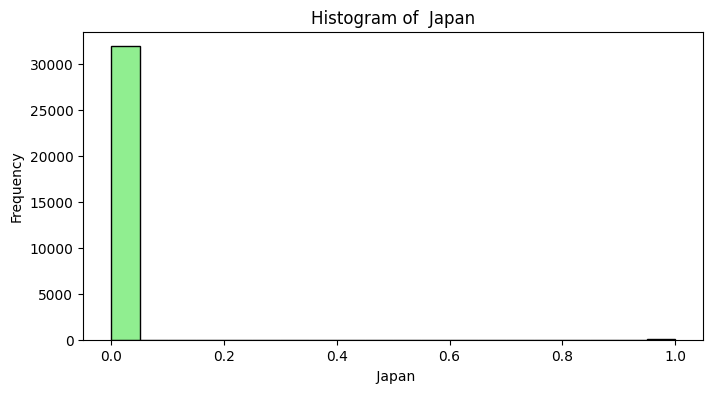

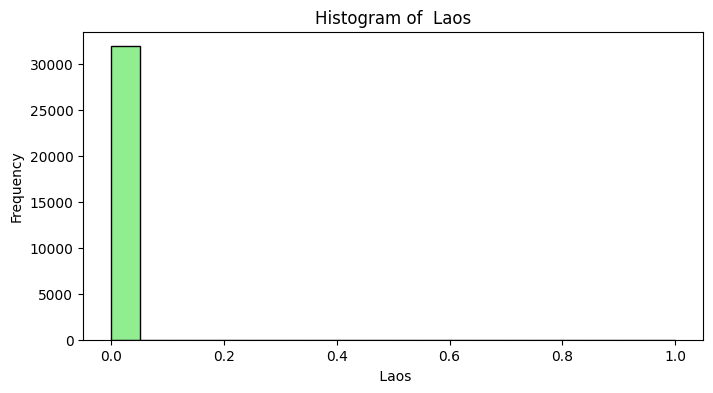

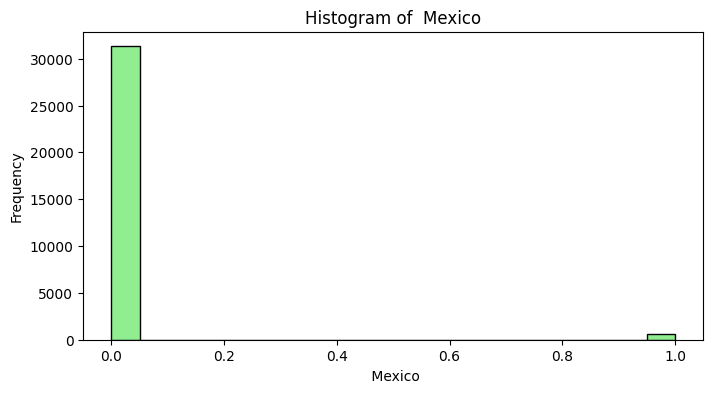

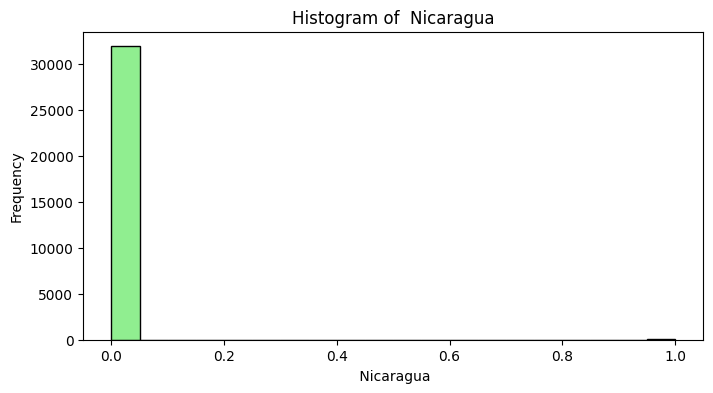

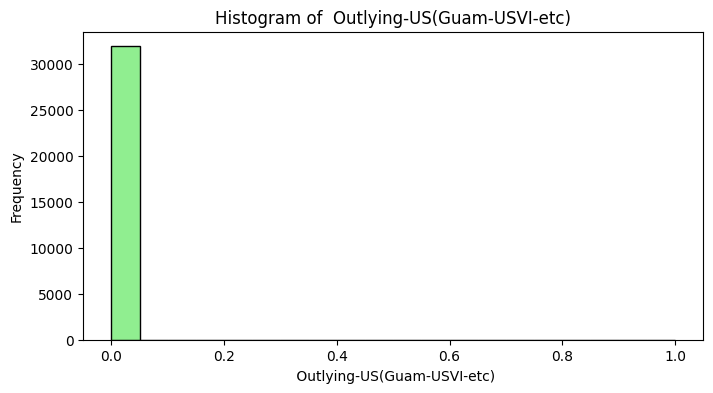

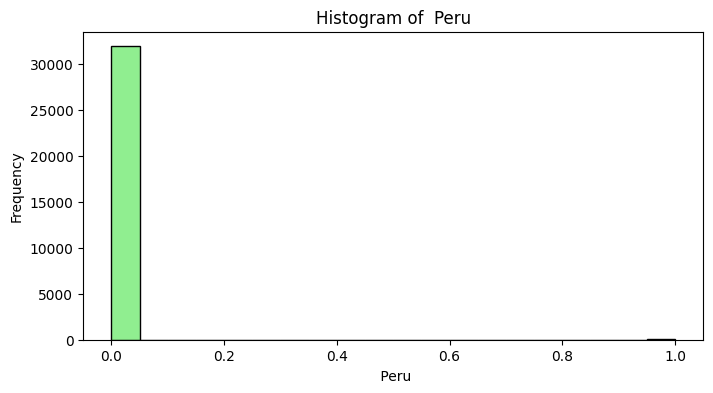

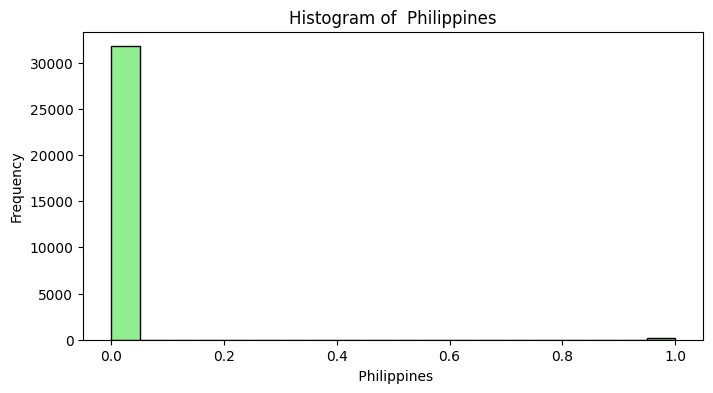

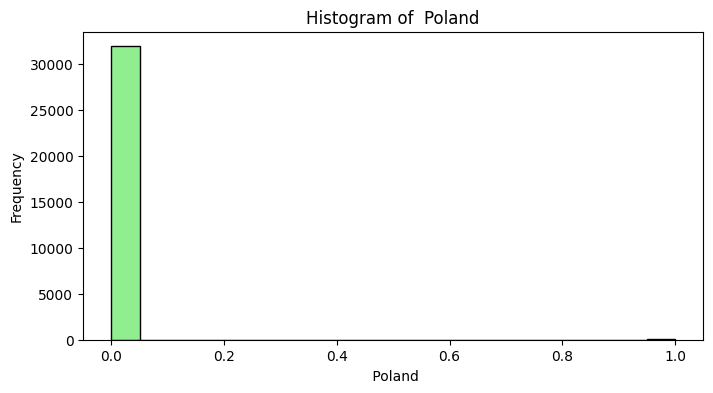

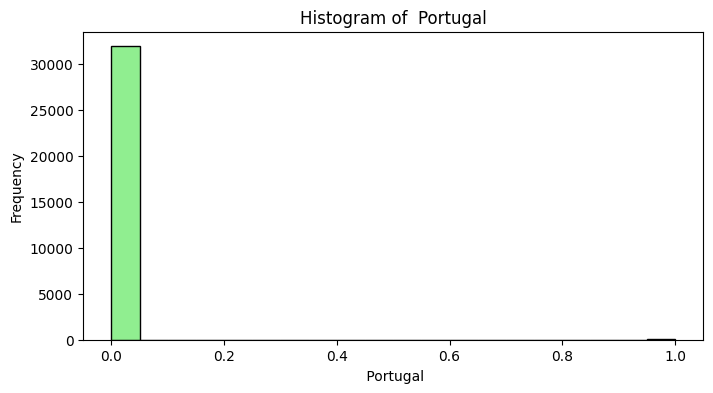

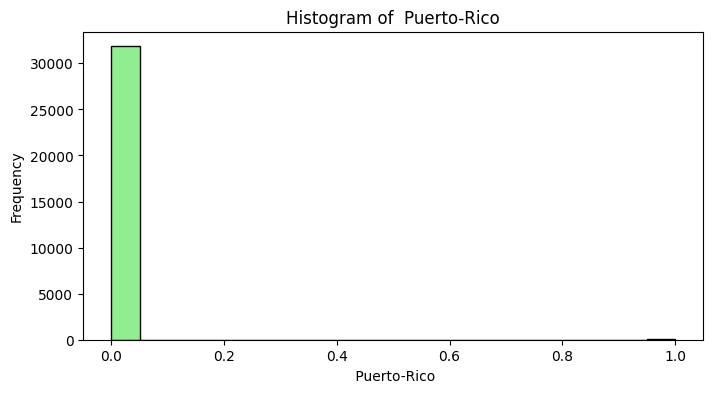

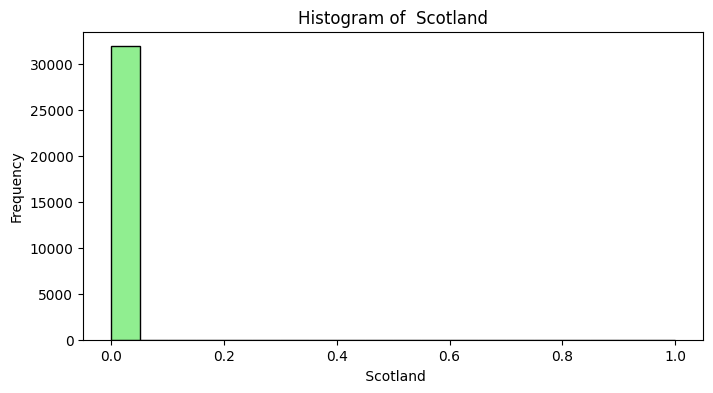

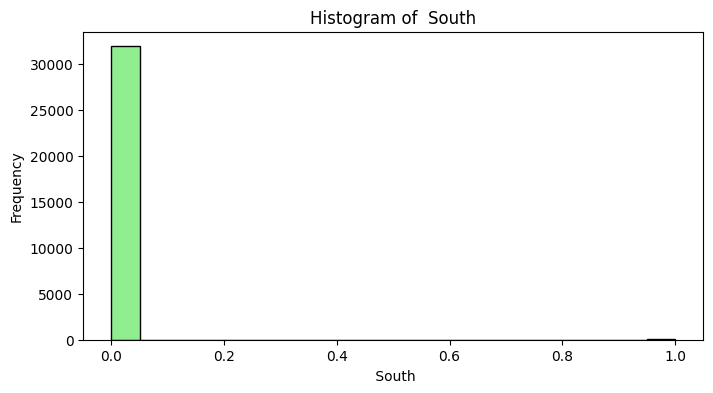

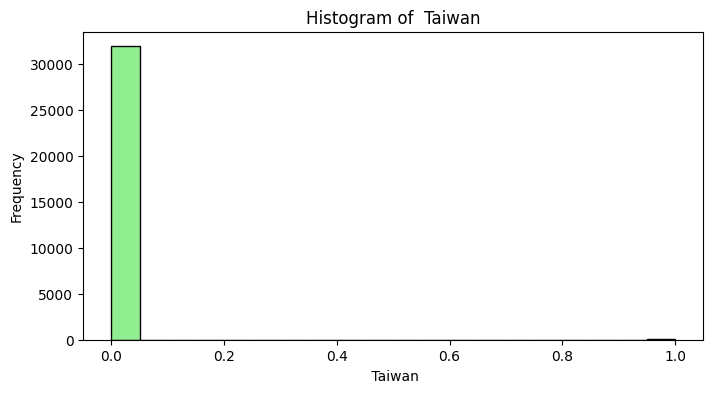

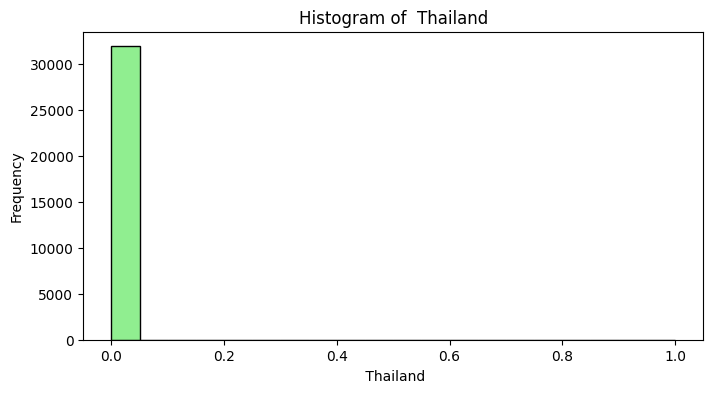

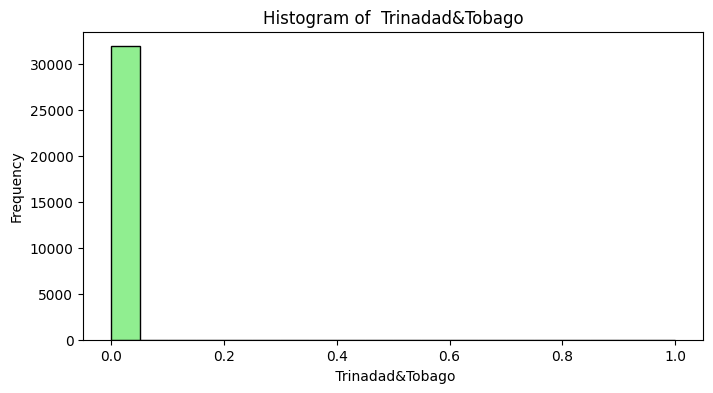

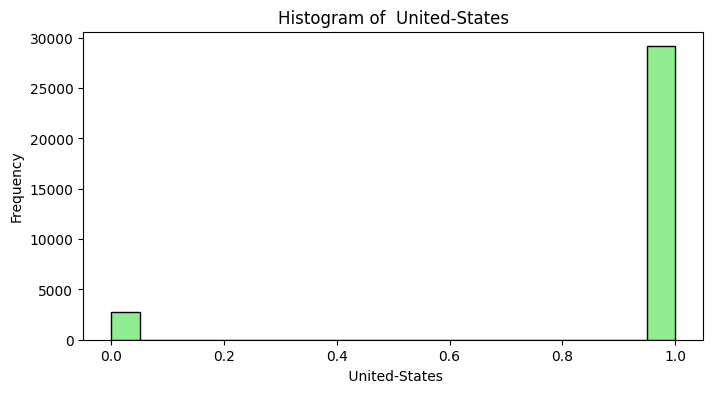

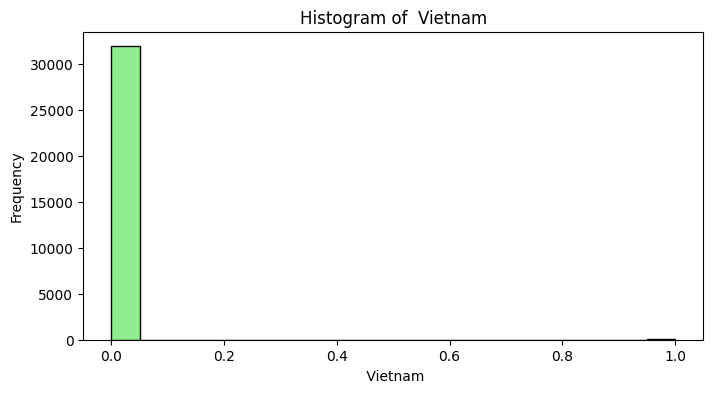

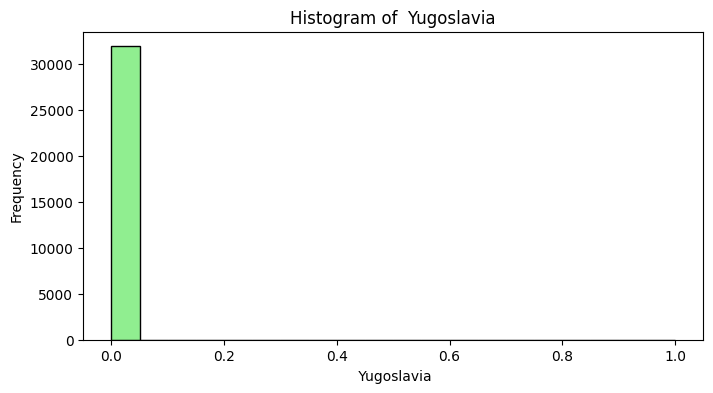

In [37]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100, stratify=y)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)


X_train =  (25564, 89)  y_train =  (25564,)
X_test  =  (6391, 89)  y_test  =  (6391,)


In [39]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)


Index(['age', 'fnlwgt', 'education', 'education.num', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', ' Federal-gov', ' Local-gov',
       ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
       ' State-gov', ' Without-pay', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
  

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])


X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [41]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(X_train,y_train)
y_pred=lo.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.856829917070881

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report
f1=f1_score(y_test,y_pred,average='micro')
print(f1)
print(classification_report(y_test,y_pred))


0.856829917070881
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4852
           1       0.75      0.61      0.67      1539

    accuracy                           0.86      6391
   macro avg       0.82      0.77      0.79      6391
weighted avg       0.85      0.86      0.85      6391



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8300735409169144

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
DecisionTreeClassifier(criterion='entropy',max_depth=10)
RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)

In [46]:
models ={
    #"Logistic Regression":LogisticRegression(),
    #"KNN":KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1), #  minkowski , euclidean , manhattan
    #"GaussianNB":GaussianNB(),
    #"SVM":SVC(kernel='linear', C=100, gamma=1,probability=True), # kernel='rbf' / kernel='poly', degree=4 / kernel='sigmoid
    "Decision Tree":DecisionTreeClassifier(criterion='entropy',max_depth=10), #{"gini", "entropy", "log_loss"}
    "Random Forest":RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10) #{"gini", "entropy", "log_loss"}
}

In [47]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    Acc_Train = accuracy_score(y_train,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_train,y_pred_train,average='binary')
    Pre_Test  =  precision_score(y_test,y_pred_test,average='binary')

    Rec_Train = recall_score(y_train,y_pred_train,average='binary')
    Rec_Test  =  recall_score(y_test,y_pred_test,average='binary')

    F1_Train = f1_score(y_train,y_pred_train,average='binary')
    F1_Test  =  f1_score(y_test,y_pred_test,average='binary')

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])


In [48]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train",
                               "Acc_Test","Pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test
Decision Tree,0.867705,0.805286,0.594085,0.683748,0.859803,0.780786,0.580897,0.666170
Random Forest,0.859020,0.809166,0.542249,0.649348,0.855265,0.796332,0.536062,0.640777


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)


{'max_depth': 20, 'n_estimators': 200}


In [53]:
best_score = grid_search.best_score_
print(best_score)

0.8607806836236577
